In [173]:
#installing libraries
pip install factor_analyzer
!pip3 install stemming
!pip install simpledorff

SyntaxError: invalid syntax (<ipython-input-173-cc6cb1466d3f>, line 1)

In [3]:
#import all libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [4]:
#reading datasets from each Qualtrics survey
initial = pd.read_csv (r'/Users/valeria/Desktop/Pretest/InitialSurvey.csv')
data_day1 = pd.read_csv (r'/Users/valeria/Desktop/Pretest/Day1.csv')
data_day2 = pd.read_csv (r'/Users/valeria/Desktop/Pretest/Day2.csv')
data_day3 = pd.read_csv (r'/Users/valeria/Desktop/Pretest/Day3.csv')
data_day4 = pd.read_csv (r'/Users/valeria/Desktop/Pretest/Day4.csv')
data_day5 = pd.read_csv (r'/Users/valeria/Desktop/Pretest/Day5.csv')
debrief = pd.read_csv (r'/Users/valeria/Desktop/Pretest/Debrief.csv')

In [5]:
#import debrief with multiple columns with same id 
#(this occurs because not all users answer to all questions, so I need to create a loop for adding all columns with dif index)
cols=pd.Series(debrief.columns)
for dup in debrief.columns[debrief.columns.duplicated(keep=False)]: 
    cols[debrief.columns.get_loc(dup)] = ([dup + '.' + str(d_idx) 
                                     if d_idx != 0 
                                     else dup 
                                     for d_idx in range(debrief.columns.get_loc(dup).sum())]
                                    )
debrief.columns=cols

In [6]:
#verify the columns in the debrief to rename them later
debrief.columns

In [7]:
#create general dataframes with login IDs, and starting dates
initial = initial.filter(['Start Date','LoginID', 'GA', 'NOS', 'FB', '2', '3', '4'], axis = 1)
df_d1 = data_day1.filter(['Start Date','LoginID', '1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)
df_d2 = data_day2.filter(['Start Date','LoginID', '1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)
df_d3 = data_day3.filter(['Start Date','LoginID', '1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)
df_d4 = data_day4.filter(['Start Date','LoginID', '1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)
df_d5 = data_day5.filter(['Start Date','LoginID', '1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)
debrief = debrief.filter(['Start Date','LoginID','1_1', '1_2',
       '1_3', '1_4', '1_5', '1_6', '1_7', '2_1', '2_2', '2_3', '2_4', '2_5',
       '3', '4_1', '4_2', '4_3', '4_4', '4_5', '4_6', '4_7', '4_8', '5', '6',
       '7', '2_1.1', '2_2.1', '2_3.1', '2_4.1', '2_5.1', '3.1', '4_1.1',
       '4_2.1', '4_3.1', '4_4.1', '4_5.1', '4_6.1', '4_7.1', '4_8.1', '5.1',
       '6.1', '7.1', '2_1.2', '2_2.2', '2_3.2', '2_4.2', '2_5.2', '3.2',
       '4_1.2', '4_2.2', '4_3.2', '4_4.2', '4_5.2', '4_6.2', '4_7.2', '4_8.2',
       '5.2', '6.2', '7.2'], axis = 1)

In [8]:
#cleaning data because it has the question and other variables that I don't need for the dataframes
#run twice before deleting the first two rows
initial = initial.iloc[1: , :]
initial = initial.iloc[1: , :]

In [9]:
#cleaning data
#run twice before deleting the first two rows
debrief = debrief.iloc[1: , :]
debrief = debrief.iloc[1: , :]
#run twice before deleting the first row
df_d1 = df_d1.iloc[1: , :]
df_d1 = df_d1.iloc[1: , :]
#run twice before deleting the first row
df_d2 = df_d2.iloc[1: , :]
df_d2 = df_d2.iloc[1: , :]
#run twice before deleting the first row
df_d3 = df_d3.iloc[1: , :]
df_d3 = df_d3.iloc[1: , :]
#run twice before deleting the first row
df_d4 = df_d4.iloc[1: , :]
df_d4 = df_d4.iloc[1: , :]
#run twice before deleting the first row
df_d5 = df_d5.iloc[1: , :]
df_d5 = df_d5.iloc[1: , :]

In [10]:
#removing duplicates in the LoginID "probably will only happen in pretest"? 

initial = initial.drop_duplicates(subset=['LoginID'],keep='first')
debrief = debrief.drop_duplicates(subset=['LoginID'],keep='first')
#droping all duplicates
df_d1 = df_d1.drop_duplicates(subset=['LoginID'],keep='first')
df_d1
df_d2 = df_d2.drop_duplicates(subset=['LoginID'],keep='first')
df_d2
df_d3 = df_d3.drop_duplicates(subset=['LoginID'],keep='first')
df_d3
df_d4 = df_d4.drop_duplicates(subset=['LoginID'],keep='first')
df_d4
df_d5 = df_d5.drop_duplicates(subset=['LoginID'],keep='first')
df_d5



In [11]:
#drop the items that do not have a loginID or that do not answer debrief survey
#then fill with 0 the na for the debrief because not all questions were answered
initial.dropna(subset = ["LoginID"], inplace=True)
debrief.dropna(axis=1, how='all')
initial = initial.fillna(0)
debrief = debrief.fillna(0)
print(initial)

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q_RecaptchaScore', '1_1', '1_2',
       '1_3', '1_4', '1_5', '1_6', '1_7', '2_1', '2_2', '2_3', '2_4', '2_5',
       '3', '4_1', '4_2', '4_3', '4_4', '4_5', '4_6', '4_7', '4_8', '5', '6',
       '7', '2_1.1', '2_2.1', '2_3.1', '2_4.1', '2_5.1', '3.1', '4_1.1',
       '4_2.1', '4_3.1', '4_4.1', '4_5.1', '4_6.1', '4_7.1', '4_8.1', '5.1',
       '6.1', '7.1', '2_1.2', '2_2.2', '2_3.2', '2_4.2', '2_5.2', '3.2',
       '4_1.2', '4_2.2', '4_3.2', '4_4.2', '4_5.2', '4_6.2', '4_7.2', '4_8.2',
       '5.2', '6.2', '7.2', 'FB', 'GA', 'NOS', 'tid', 'LoginID', 'ScreenGA',
       'ScreenFB', 'ScreenNOS'],
      dtype='object')

In [12]:
#check the data for the debrief
debrief

In [20]:
#droping all na from issues
df_d1 = df_d1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_d2 = df_d2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_d3 = df_d3.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_d4 = df_d4.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_d5 = df_d5.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [21]:
#creating new datasets for each issue day per day to later concate them and check word frequencies
#the first number indicates the question, the second number the rank notice that issue 4 and 5 
#are wrongly labbeled as 8 and 9 (the error comes from qualtrics), but are later renamed
issues1 = df_d1.filter(['LoginID','1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)
issues2 = df_d2.filter(['LoginID','1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)
issues3 = df_d3.filter(['LoginID','1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)
issues4 = df_d4.filter(['LoginID','1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)
issues5 = df_d5.filter(['LoginID','1_1', '1_2', '1_3', '1_8', '1_9', '2_1', '2_2', '2_3', '2_8', '2_9'], axis = 1)

In [22]:
frames = [issues1, issues2, issues3, issues4, issues5]
#concat frames to create one data set with all issues per day
issues = pd.concat(frames)
issues = issues.drop_duplicates()
issues = issues.dropna()
issues

In [23]:
#drop testing data (pretest only)
issues.drop(index=issues[issues['LoginID'] == 'vale'].index, inplace=True)
issues.drop(index=issues[issues['LoginID'] == '1000'].index, inplace=True)

,LoginID,1_1,1_2,1_3,1_8,1_9,2_1,2_2,2_3,2_8,2_9
2,4626,Afghanistan,Formatie,Dividentbelasting,-,-,Formatie,Vrouwenvoetbal,Afghanistan,-,-
4,3813,kabinet formatie,steekincident almelo,griep,oranjeleeuwinnen,motie van afkeuring,kabinet formatie,steekincident almelo,coronaprotest,drone aanval van VS,griep
5,4293,aging population,lack of political stability,pollution,undesirable housing market,life costs,covid,racism,politics,crime rate,taxes
7,1714,The new corona measurements,Tata Steel frabric health issue,Minsiter of foreign affairs resigns,Drug traffic,disruption of train traffic,New corona measurements,Climate change,Afghanistan crisis,Abuse US gymnasitic team,MET gala
9,2362,Housing crisis,Covid measures,Vaccine passport,Afghanistan conflict,Climate change,Covid,Afghanistan,Climate change,Haiti earthquake refugees,Conflict in south china sea
10,1792,Housing market,Healthcare system,Unemployment for internationals,Sexual assault,Environment,Corona measures,International students struggling to find housing,Healthcare sector carelessness,Drug traffickers teaching children,Nazi stunts in Urk
13,3033,New corona pass rules,Travel to the Netherlands under new COVID rules,Amsterdam bridge and tunnel plan,Rutte visit to the UK,Assessment of work-life balance in the Netherl...,Corona virus new measures around the world,Corona virus vaccine,After Taliban took over Afghanistan,US Australia new deal,New LGBTQ+ right legislation in EU
2,1928,Corona,Tweede kamer,Europa,Milieu,Sigrid kaag,Staatsschuld,Coronaboetes,Sigrid kaag,Ruimteschip dat terugkeert,Corona
3,1902,Formatie,Afghanistan,Opstappen Kaag & Bijleveld,Max Verstappen F1,Belastingaffaire,Ajax 9-0,Formatieweekend,Opstappen Sigrid Kaag,Opstappen Ank Bijleveld,11.000 boetes mondkapjes
4,4626,coronapas,Afghanistan,formatie,-,-,corona,formatie,Afghanistan,-,-


In [24]:
issues

,LoginID,1_1,1_2,1_3,1_8,1_9,2_1,2_2,2_3,2_8,2_9
5,4293,aging population,lack of political stability,pollution,undesirable housing market,life costs,covid,racism,politics,crime rate,taxes
7,1714,The new corona measurements,Tata Steel frabric health issue,Minsiter of foreign affairs resigns,Drug traffic,disruption of train traffic,New corona measurements,Climate change,Afghanistan crisis,Abuse US gymnasitic team,MET gala
9,2362,Housing crisis,Covid measures,Vaccine passport,Afghanistan conflict,Climate change,Covid,Afghanistan,Climate change,Haiti earthquake refugees,Conflict in south china sea
10,1792,Housing market,Healthcare system,Unemployment for internationals,Sexual assault,Environment,Corona measures,International students struggling to find housing,Healthcare sector carelessness,Drug traffickers teaching children,Nazi stunts in Urk
13,3033,New corona pass rules,Travel to the Netherlands under new COVID rules,Amsterdam bridge and tunnel plan,Rutte visit to the UK,Assessment of work-life balance in the Netherl...,Corona virus new measures around the world,Corona virus vaccine,After Taliban took over Afghanistan,US Australia new deal,New LGBTQ+ right legislation in EU
3,1902,Formatie,Afghanistan,Opstappen Kaag & Bijleveld,Max Verstappen F1,Belastingaffaire,Ajax 9-0,Formatieweekend,Opstappen Sigrid Kaag,Opstappen Ank Bijleveld,11.000 boetes mondkapjes
5,2370,Covid 19,housing,environment,crime,unemployment,Afghanistan refugee crisis,COVID-19,environment,income inequality,discrimination
6,1792,Housing market crisis,Foreigners cannot find a job,Poor healthcare system,Sexual assault,Corona measures,Nazi stunt in Urk,Non-EU visitors needing daily tests,Foreign students can't find a place to live,Drug traffickers training children to work,Museums asking for financial support
8,1714,Corona measurements,Tata steel fabric health issues,Minister of foreins affairs resigns,Train trafic disruptions,Drug traffic,Corona measurements,Climate change,Afghanistan crisis,US gymnastic team abuse,MET gala
11,4293,racism,weed,unstable political system,poor housing market,high life cost,high taxes,life quality,politics,environmental issues,high crime rate


In [27]:
#Rename columns by day, question, issue set 

In [28]:
initial.rename(columns={'2': 'Age','3': 'Gender', '4': 'Education'}, inplace=True)
#reindexing columns
debrief.rename(columns={'LoginID': 'LoginID',
                        '1_1':'GMT1','1_2':'GMT2',
                        '1_3':'GMT3',
                        '1_4':'GMT4','1_5':'GMT5',
                        '1_6':'GMT6','1_7':'GMT7',
                        '2_1':'TGA1','2_2':'TGA2',
                        '2_3':'TGA3','2_4':'TGA4',
                        '2_5':'TGA5','3':'AGA1',
                        '4_1': 'AGA2', '4_2': 'AGA3',
                        '4_3': 'AGA4', '4_4':'AGA5',
                        '4_5':'AGA6',
                        '4_6':'AGA7',
                        '4_7':'AGA8',
                        '4_8':'AGA9', '5':'PLDGA1',
                        '6':'PLDGA2', '7':'CUSGA',
                        '2_1.1':'TFB1', '2_2.1':'TFB2', '2_3.1':'TFB3', '2_4.1':'TFB4',
                        '2_5.1':'TFB5', '3.1':'AFB1', '4_1.1':'AFB2', '4_2.1':'AFB3',
                        '4_3.1':'AFB4', '4_4.1':'AFB5', '4_5.1':'AFB6', '4_6.1':'AFB7',
                        '4_7.1':'AFB8', '4_8.1':'AFB9', '5.1':'PLDFB1',
                        '6.1':'PLDFB2', '7.1':'CUSFB',
                        '2_1.2':'TNOS1', '2_2.2':'TNOS2', '2_3.2':'TNOS3',
                        '2_4.2':'TNOS4', '2_5.2':'TNOS5', '3.2':'ANOS1',
                        '4_1.2':'ANOS2', '4_2.2':'ANOS3', '4_3.2':'ANOS4', '4_4.2':'ANOS5',
                        '4_5.2':'ANOS6',
                        '4_6.2':'ANOS7', '4_7.2':'ANOS8', '4_8.2':'ANOS9',
                        '5.2':'PLDNOS1', '6.2':'PLDNOS2', '7.2':'CUSNOS',
                        }, 
                     index={'1': '1',
                        '2':'2','3':'3',
                        '4':'4',
                        '5':'5'}, inplace=True)

In [29]:
#export debrief and initial survey to verify that dataframes have the necessary data
debrief.to_csv('debrief_test.csv', index=False)
initial.to_csv('initial_test.csv', index=False)

In [ ]:
#here all columns per day are re-labelled.
#The first number indicates the day, the second the question, the third the rank
#e.g. day 1 question 1 rank 1 = 1_1_1 ... day 4 question 2 rank 2 = 4_2_2

In [30]:
df_d1.rename(columns={"1_1": "1_1_1", "1_2": "1_1_2", "1_3": "1_1_3","1_8": "1_1_4","1_9": "1_1_5","2_1": "1_2_1","2_2": "1_2_2","2_3": "1_2_3","2_8": "1_2_4","2_9": "1_2_5" }, inplace=True)

In [31]:
df_d2.rename(columns={"1_1": "2_1_1", "1_2": "2_1_2", "1_3": "2_1_3","1_8": "2_1_4","1_9": "2_1_5","2_1": "2_2_1","2_2": "2_2_2","2_3": "2_2_3","2_8": "2_2_4","2_9": "2_2_5" }, inplace=True)

In [32]:
df_d3.rename(columns={"1_1": "3_1_1", "1_2": "3_1_2", "1_3": "3_1_3","1_8": "3_1_4","1_9": "3_1_5","2_1": "3_2_1","2_2": "3_2_2","2_3": "3_2_3","2_8": "3_2_4","2_9": "3_2_5" }, inplace=True)

In [33]:
df_d4.rename(columns={"1_1": "4_1_1", "1_2": "4_1_2", "1_3": "4_1_3","1_8": "4_1_4","1_9": "4_1_5","2_1": "4_2_1","2_2": "4_2_2","2_3": "4_2_3","2_8": "4_2_4","2_9": "4_2_5" }, inplace=True)

In [34]:
df_d5.rename(columns={"1_1": "5_1_1", "1_2": "5_1_2", "1_3": "5_1_3","1_8": "5_1_4","1_9": "5_1_5","2_1": "5_2_1","2_2": "5_2_2","2_3": "5_2_3","2_8": "5_2_4","2_9": "5_2_5" }, inplace=True)

In [35]:
#replacing values for numbers in debrief survey (only pretest)
#For real survey verify this item because I already added the recoding in qualtrics.
debrief = debrief.replace(['Agree -6'],6)
debrief = debrief.replace(['Somewhat agree -5'],5)
debrief = debrief.replace(['Neither agree nor disagree - 4'],4)
debrief = debrief.replace(['Somewhat disagree - 3'],3)
debrief = debrief.replace(['Far too little - 1'],1)
debrief = debrief.replace(['Moderately too little - 2'],2)
debrief = debrief.replace(['Slightly too little - 3'],3)
debrief = debrief.replace(['Slightly too little attention - 3'],3)
debrief = debrief.replace(['Slightly too much attention - 5'],5)
debrief = debrief.replace(['Neither too much nor too little attention - 4'],4)
debrief = debrief.replace(['Moderately too much attention - 6'],6)
debrief = debrief.replace(['Agree - 6'],6)
debrief = debrief.replace(['Never - 1'],1)
debrief = debrief.replace(['Disagree - 2'],2)
debrief = debrief.replace(['Strongly disagree - 1'],1)
debrief = debrief.replace(['Somewhat agree - 5'],5)
debrief = debrief.replace(['About half of the time - 4'],4)
debrief = debrief.replace(['Neither too much nor too little - 4'],4)
debrief = debrief.replace(['Slightly too much - 5'],5)
debrief = debrief.replace(['Moderately too much - 6'],6)
debrief = debrief.replace(['Usually - 5'],5)
debrief = debrief.replace(['Neither agree of disagree - 4'],4)

debrief.describe()

,GMT1,GMT2,GMT3,GMT4,GMT5,GMT6,GMT7,TGA1,TGA2,TGA3,...,ANOS3,ANOS4,ANOS5,ANOS6,ANOS7,ANOS8,ANOS9,PLDNOS1,PLDNOS2,CUSNOS
count,5.00000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.0,5.0,5.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,4.80000,5.000000,4.600000,3.400000,3.600000,4.20000,4.400000,0.0,0.0,0.0,...,0.600000,1.000000,0.800000,1.000000,1.000000,0.800000,1.200000,0.800000,0.800000,0.200000
std,0.83666,1.224745,0.547723,1.949359,0.894427,1.30384,1.949359,0.0,0.0,0.0,...,1.341641,2.236068,1.788854,2.236068,2.236068,1.788854,2.683282,1.788854,1.788854,0.447214
min,4.00000,3.000000,4.000000,2.000000,3.000000,2.00000,1.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.00000,5.000000,4.000000,2.000000,3.000000,4.00000,5.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.00000,5.000000,5.000000,2.000000,3.000000,5.00000,5.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.00000,6.000000,5.000000,5.000000,4.000000,5.00000,5.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.00000,6.000000,5.000000,6.000000,5.000000,5.00000,6.000000,0.0,0.0,0.0,...,3.000000,5.000000,4.000000,5.000000,5.000000,4.000000,6.000000,4.000000,4.000000,1.000000


In [36]:
#also recoding for initial survey 
#verify if it is necessary for the real survey
initial = initial.replace(['Male'],0)
initial = initial.replace(['Female'],1)
initial = initial.replace(['Non-binary / third gender'],2)
initial = initial.replace(['None or primary education'],1)
initial = initial.replace(['HAVO or VWO (4th, 5th or 6th class) / HBS / MMS (high school)'],2)
initial = initial.replace(['HBO (except HBO master) / WO candidate or WO bachelor'],3)

In [ ]:
#https://stackoverflow.com/questions/58308972/create-a-new-column-with-three-conditions-using-np-where
#creating groups based on conditions. (verify the minium number for belonging to a group, is 1 enough?. 
#It is also necessary to check it during soft quotas in the real test
conditions = [
    initial['GA'].astype(int) >= 1,
    initial['NOS'].astype(int) >= 1,
    initial['FB'].astype(int) >= 1
]
choices = ['Google Assistant', 'NOS', 'Facebook']

initial['group'] = np.select(conditions, choices)
initial

In [37]:
#adding the days to all issues and creating a new dataframe called issuesID for making a new dataset later
frames = [issues1, issues2, issues3, issues4]
day1 = "1"
issues1['Day'] = "1"
issues2['Day'] = "2"
issues3['Day'] = "3"
issues4['Day'] = "4"
issues5['Day'] = "5"

#appending data
issuesID = initial.append([issues1,issues2,issues3,issues4, issues5])
issuesID

,LoginID,GA,NOS,FB,Age,Gender,Education,group
3,3258,4,4,2,24,1,2,Google Assistant
4,3033,0,0,5,20,1,2,Facebook
5,2032,0,0,2,23,1,2,Facebook
6,1714,0,4,0,20,1,2,NOS
7,3106,0,0,2,25,0,3,Facebook
8,1930,0,2,2,0,1,1,NOS
9,2577,0,0,3,19,1,2,Facebook
10,4626,0,5,0,19,0,1,NOS
11,1928,0,5,5,22,1,1,NOS
12,1902,0,2,4,22,1,2,NOS


In [ ]:
#grouping the datasets by login ID and I will append them later to have a nice dataframe
issuesID.groupby('LoginID').first()

In [ ]:
#here I merge the issues with the initial dataset to have all ids, groups etc from each individual
issuesID1 = pd.merge(initial, issues1, how='outer', on="LoginID")
issuesID2 = pd.merge(initial, issues2, how='outer', on="LoginID")
issuesID3 = pd.merge(initial, issues3, how='outer', on="LoginID")
issuesID4 = pd.merge(initial, issues4, how='outer', on="LoginID")
issuesID5 = pd.merge(initial, issues5, how='outer', on="LoginID")

In [41]:
#After merging all issues with initial dataset I append them to the first dataset.
#This is a way to avoid having multiple empty columns without the info of the participant
issuesIDALL = issuesID1.append([issuesID2, issuesID3, issuesID4, issuesID5])

In [42]:
#here I drop the rows that were only used for testing (the ones that do not have a group and thus are categorized as 0)
issuesIDALL.drop(issuesIDALL.loc[issuesIDALL['group']=='0'].index, inplace=True)

In [43]:
#export the dataframe to verify the data is organized
issuesIDALL.to_csv('issuesIDALL.csv', index=False)

In [44]:
#create data frame for debrief

In [45]:
#this is a new data frame with the new variable names
#the labels are based on the variables 
#GMT = GENERALIZED MEDIA TRUST, 
#TGA = Trust Google Assistant, 
#AGA = Attention Google Assistant, 
#PLD = Perceived Lack Diversity ..,
#Cus = Customization ...
debrief_statistical = debrief[['GMT1','GMT2',
                        'GMT3',
                        'GMT4','GMT5',
                        'GMT6','GMT7',
                        'TGA1','TGA2',
                        'TGA3','TGA4',
                        'TGA5','AGA1',
                        'AGA2','AGA3',
                        'AGA4','AGA5',
                        'AGA6',
                        'AGA7',
                       'AGA8',
                        'AGA9','PLDGA1',
                        'PLDGA2', 'CUSGA',
                        'TFB1', 'TFB2', 'TFB3', 'TFB4',
                        'TFB5', 'AFB1', 'AFB2', 'AFB3',
                        'AFB4', 'AFB5', 'AFB6', 'AFB7',
                        'AFB8', 'AFB9', 'PLDFB1',
                        'PLDFB2','CUSFB',
                        'TNOS1','TNOS2','TNOS3',
                        'TNOS4','TNOS5', 'ANOS1',
                        'ANOS2','ANOS3', 'ANOS4','ANOS5',
                        'ANOS6',
                       'ANOS7','ANOS8', 'ANOS9',
                        'PLDNOS1','PLDNOS2','CUSNOS']].copy()

In [46]:
#CREATE UNIQUE VARIABLES (MEANS) FROM THE MULTIPLE VARIABLES
debrief_statistical['GMT_MEAN'] = debrief_statistical[['GMT1','GMT2','GMT3','GMT4','GMT5','GMT6','GMT7']].mean(axis=1)
debrief_statistical['TGA_MEAN'] = debrief_statistical[['TGA1','TGA2','TGA3','TGA4','TGA5']].mean(axis=1)
debrief_statistical['AGA_MEAN'] = debrief_statistical[['AGA1','AGA2','AGA3','AGA4','AGA5','AGA6','AGA7','AGA8','AGA9']].mean(axis=1)
debrief_statistical['PLDGA_MEAN'] = debrief_statistical[['PLDGA1','PLDGA2']].mean(axis=1)
debrief_statistical['TFB_MEAN'] = debrief_statistical[['TFB1', 'TFB2', 'TFB3', 'TFB4','TFB5']].mean(axis=1)
debrief_statistical['AFB_MEAN'] = debrief_statistical[['AFB1', 'AFB2', 'AFB3','AFB4', 'AFB5', 'AFB6', 'AFB7','AFB8', 'AFB9']].mean(axis=1)
debrief_statistical['PLDFB_MEAN'] = debrief_statistical[['PLDFB1', 'PLDFB2']].mean(axis=1)
debrief_statistical['TNOS_MEAN'] = debrief_statistical[['TNOS1','TNOS2','TNOS3','TNOS4','TNOS5']].mean(axis=1)
debrief_statistical['ANOS_MEAN'] = debrief_statistical[['ANOS1','ANOS2','ANOS3', 'ANOS4','ANOS5','ANOS6','ANOS7','ANOS8','ANOS9']].mean(axis=1)
debrief_statistical['PLDNOS_MEAN'] = debrief_statistical[['PLDNOS1','PLDNOS2']].mean(axis=1)

In [47]:
#making an array of General Media Trust for testing factor analysis 
#the factor analysis gives an error bc I have a lot of missing data on the pretest 
#At this point the factor analysis for the debrief is moved to R to omit NAs
GTM = debrief_statistical[['GMT1','GMT2','GMT3','GMT4','GMT5','GMT6','GMT7']]
GTM.to_numpy()

array([[5, 5, 5, 5, 5, 5, 5],
       [4, 6, 5, 6, 3, 2, 1],
       [4, 3, 4, 2, 3, 5, 5],
       [5, 5, 5, 2, 3, 5, 6],
       [6, 6, 4, 2, 4, 4, 5]])

In [48]:
#factor analysis text (not working bc of missing data)
# factor_debrief = debrief_statistical
# factor_debrief.drop([
#        'GMT_MEAN', 'TGA_MEAN', 'AGA_MEAN', 'PLDGA_MEAN', 'TFB_MEAN',
#        'AFB_MEAN', 'PLDFB_MEAN', 'TNOS_MEAN', 'ANOS_MEAN', 'PLDNOS_MEAN'], axis=1, inplace=True)

In [49]:
# factor_debrief.to_csv('factor_debrief_r.csv', index=False)

Index(['GMT1', 'GMT2', 'GMT3', 'GMT4', 'GMT5', 'GMT6', 'GMT7', 'TGA1', 'TGA2',
       'TGA3', 'TGA4', 'TGA5', 'AGA1', 'AGA2', 'AGA3', 'AGA4', 'AGA5', 'AGA6',
       'AGA7', 'AGA8', 'AGA9', 'PLDGA1', 'PLDGA2', 'CUSGA', 'TFB1', 'TFB2',
       'TFB3', 'TFB4', 'TFB5', 'AFB1', 'AFB2', 'AFB3', 'AFB4', 'AFB5', 'AFB6',
       'AFB7', 'AFB8', 'AFB9', 'PLDFB1', 'PLDFB2', 'CUSFB', 'TNOS1', 'TNOS2',
       'TNOS3', 'TNOS4', 'TNOS5', 'ANOS1', 'ANOS2', 'ANOS3', 'ANOS4', 'ANOS5',
       'ANOS6', 'ANOS7', 'ANOS8', 'ANOS9', 'PLDNOS1', 'PLDNOS2', 'CUSNOS',
       'GMT_MEAN', 'TGA_MEAN', 'AGA_MEAN', 'PLDGA_MEAN', 'TFB_MEAN',
       'AFB_MEAN', 'PLDFB_MEAN', 'TNOS_MEAN', 'ANOS_MEAN', 'PLDNOS_MEAN'],
      dtype='object')

In [61]:
# from sklearn.decomposition import FactorAnalysis
# X = factor_debrief
# transformer = FactorAnalysis(n_components=7, random_state=0)
# X_transformed = transformer.fit_transform(X)
# X_transformed.shape

In [62]:
# fit(X)

In [65]:
# pd.plotting.scatter_matrix(debrief_statistical)

In [66]:
# fa = FactorAnalyzer(n_factors = '12', rotation='varimax')
# fa.fit(factor_debrief)

In [67]:
#replacing values for initial survey gender
initial = initial.replace(['Female'],0)
initial = initial.replace(['Male'],1)

In [68]:
#setting the same index for the data frames with the issues so I can concat them
df_d1.set_index('LoginID')
df_d2.set_index('LoginID')
df_d3.set_index('LoginID')
df_d4.set_index('LoginID')
df_d5.set_index('LoginID')

,5_1_1,5_1_2,5_1_3,5_1_4,5_1_5,5_2_1,5_2_2,5_2_3,5_2_4,5_2_5
LoginID,,,,,,,,,,
vale,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0
1902,Formatie,Prinsjesdag,Oranjevrouwen,Afghanisatan,Mallorca aso jongeren,"Rutte wil dat groenlinks, pvda en christenunie...",Nederlanders geven voor eerst meer uit dan voo...,Nieuwe getuigen mallorca zaak,Ajax 0-5 gewonnen,Oranje vrouwen 0-2 gewonnen
2577,CoronaCheck,Housing shortage,pollution,Unemployment,COVID cases,Unemployment,Housing shortage,COVID,Pollution,Chip shortage in tech
2370,COVID-19,Housing,Environment,Crime,Unemployment,Afghan crisis,Covid-19,environement,Australia's earthquake,la parma volcanic activity
2229,Covid-Restriction,Racism,Global Warming,Extinction of the cultural sector,Job vacancy,Covid-Restrictions,Global Warning,Afghanistan,Vacine protest,Inequality due to Covid
4626,Formatie,Begroting,Afghanistan,-,-,Formatie,Afghanistan,Begroting,-,-
3813,Kabinet formatie,Corona maatregelen,Vulkaanuitbarsting la palma,-,-,Afwezigheid Kaag,Einde van Koeman bij Barcalona?,Forse prijsstijging energie,Arrestatie handlanger Taghi,-
3033,New update on CoronaCheck app,The Netherlands' new travel rules,Primary schools no longer have to send the who...,It is still unclear if Dutch citizens who are ...,More than 50000 people become Dutch in 2020,Italy and the US increases vaccine donation fo...,France stepped in into the US - Australia subm...,The global COVID infected number has fallen to...,China's plan to reduce CO2 emission,Angela Merkel's about the leave the house in t...


In [69]:
#another way to merge the data
import pandas as pd
from functools import reduce

# compile the list of dataframes you want to merge
data_frames = [initial, df_d1, df_d2, df_d3, df_d4, df_d5]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['LoginID'],
                                            how='outer'), data_frames)
df_merged = df_merged.replace('NAN', np.nan)

In [199]:
df_merged

,LoginID,GA,NOS,FB,Age,Gender,Education,group,1_1_1,1_1_2,...,5_1_1,5_1_2,5_1_3,5_1_4,5_1_5,5_2_1,5_2_2,5_2_3,5_2_4,5_2_5
0,3258,4,4,2,24,1.0,2.0,Google Assistant,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3033,0,0,5,20,1.0,2.0,Facebook,New corona pass rules,Travel to the Netherlands under new COVID rules,...,New update on CoronaCheck app,The Netherlands' new travel rules,Primary schools no longer have to send the who...,It is still unclear if Dutch citizens who are ...,More than 50000 people become Dutch in 2020,Italy and the US increases vaccine donation fo...,France stepped in into the US - Australia subm...,The global COVID infected number has fallen to...,China's plan to reduce CO2 emission,Angela Merkel's about the leave the house in t...
2,2032,0,0,2,23,1.0,2.0,Facebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1714,0,4,0,20,1.0,2.0,NOS,The new corona measurements,Tata Steel frabric health issue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3106,0,0,2,25,0.0,3.0,Facebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1930,0,2,2,0,1.0,1.0,NOS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2577,0,0,3,19,1.0,2.0,Facebook,NaN,NaN,...,CoronaCheck,Housing shortage,pollution,Unemployment,COVID cases,Unemployment,Housing shortage,COVID,Pollution,Chip shortage in tech
7,4626,0,5,0,19,0.0,1.0,NOS,Afghanistan,Formatie,...,Formatie,Begroting,Afghanistan,-,-,Formatie,Afghanistan,Begroting,-,-
8,1928,0,5,5,22,1.0,1.0,NOS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1902,0,2,4,22,1.0,2.0,NOS,NaN,NaN,...,Formatie,Prinsjesdag,Oranjevrouwen,Afghanisatan,Mallorca aso jongeren,"Rutte wil dat groenlinks, pvda en christenunie...",Nederlanders geven voor eerst meer uit dan voo...,Nieuwe getuigen mallorca zaak,Ajax 0-5 gewonnen,Oranje vrouwen 0-2 gewonnen


In [ ]:
df_merged.describe()

In [70]:
#verify I have the data frame I wanted
df_merged.to_csv('test2.csv', index=False)


In [ ]:
###### AT THIS POINT I STOP CREATING DATAFRAMES AND START COUNTING WORDS ######
###### IN THE NEXT LINES I MERGED THE ISSUES TO COUNT WORD FREQUENCIES ######
###### ADDITIONALLY THE WORD FREQUENCIES ARE MEASURED INDEPENDENTLY ######

In [133]:
#Create a list of text with all issues separated by commas
# each lines = the issues reported by each individual 
#TODO ADD LABELS TO THE SERIES SO IT IS EASIER CREATE THE SIMILARITY FOR EACH INDIVIDUAL!
listtext = issues['1_1'] + ',' + issues['1_2'] + ',' + issues['1_3'] + ',' + issues['1_8'] + ',' + issues['1_9'] + ',' + issues['2_1'] + ',' + issues['2_2'] + ',' + issues['2_3'] + ',' + issues['2_8'] + ',' + issues['2_9']
listtext

5     aging population,lack of political stability ,...
7     The new corona measurements,Tata Steel frabric...
9     Housing crisis,Covid measures,Vaccine passport...
10    Housing market,Healthcare system,Unemployment ...
13    New corona pass rules,Travel to the Netherland...
3     Formatie,Afghanistan,Opstappen Kaag & Bijlevel...
5     Covid 19,housing,environment,crime,unemploymen...
6     Housing market crisis,Foreigners cannot find a...
8     Corona measurements,Tata steel fabric health i...
11    racism,weed,unstable political system,poor hou...
17    COVID-19 cases,vaccination,refugee,unemploymen...
19    corona,kabinet vormen ,tata steel woonwijk,hui...
20    Corona Regulation,Housing,unemployment,envirom...
21    Corona measurements ,Conditions in refugee cam...
3     Russischr verkiezingen,Poetin meerderheid,Vulk...
5     Corona,Klimaat,Europa,Tweede kamer,Koningshuis...
6     NS international conductors' strike for higher...
7     CoronaCheck,COVID related,unemployment,hou

In [134]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
listtext = listtext.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(listtext)

5     aging population,lack political stability ,pol...
7     The new corona measurements,Tata Steel frabric...
9     Housing crisis,Covid measures,Vaccine passport...
10    Housing market,Healthcare system,Unemployment ...
13    New corona pass rules,Travel Netherlands new C...
3     Formatie,Afghanistan,Opstappen Kaag & Bijlevel...
5     Covid 19,housing,environment,crime,unemploymen...
6     Housing market crisis,Foreigners cannot find j...
8     Corona measurements,Tata steel fabric health i...
11    racism,weed,unstable political system,poor hou...
17    COVID-19 cases,vaccination,refugee,unemploymen...
19    corona,kabinet vormen ,tata steel woonwijk,hui...
20    Corona Regulation,Housing,unemployment,envirom...
21    Corona measurements ,Conditions refugee camps,...
3     Russischr verkiezingen,Poetin meerderheid,Vulk...
5     Corona,Klimaat,Europa,Tweede kamer,Koningshuis...
6     NS international conductors' strike higher wag...
7     CoronaCheck,COVID related,unemployment,hou

In [135]:
#make the list a data frame to create plots 
listtext_df = pd.DataFrame(listtext)
print(listtext_df)

                                                    0
5   aging population,lack political stability ,pol...
7   The new corona measurements,Tata Steel frabric...
9   Housing crisis,Covid measures,Vaccine passport...
10  Housing market,Healthcare system,Unemployment ...
13  New corona pass rules,Travel Netherlands new C...
3   Formatie,Afghanistan,Opstappen Kaag & Bijlevel...
5   Covid 19,housing,environment,crime,unemploymen...
6   Housing market crisis,Foreigners cannot find j...
8   Corona measurements,Tata steel fabric health i...
11  racism,weed,unstable political system,poor hou...
17  COVID-19 cases,vaccination,refugee,unemploymen...
19  corona,kabinet vormen ,tata steel woonwijk,hui...
20  Corona Regulation,Housing,unemployment,envirom...
21  Corona measurements ,Conditions refugee camps,...
3   Russischr verkiezingen,Poetin meerderheid,Vulk...
5   Corona,Klimaat,Europa,Tweede kamer,Koningshuis...
6   NS international conductors' strike higher wag...
7   CoronaCheck,COVID relate

In [74]:
#Word words per row in every number of issues
#notice that the word count do not include the word 
#TODO ADD THE WORDS NEXT TO FOR EACH WORD COUNT
count1_1 = issues['1_1'].str.split().str.len()
count1_1.sort_values(ascending=False)
# count1_2 = issues['1_2'].str.split().str.len()
# count1_2.sort_values(ascending=False)
# count1_3 = issues['1_3'].str.split().str.len()
# count1_3.sort_values(ascending=False)
# count1_4 = issues['1_8'].str.split().str.len()
# count1_4.sort_values(ascending=False)
# count1_5 = issues['1_9'].str.split().str.len()
# count1_5.sort_values(ascending=False)
# count1_6 = issues['1_9'].str.split().str.len()
# count1_6.sort_values(ascending=False)
# count1_7 = issues['2_1'].str.split().str.len()
# count1_7.sort_values(ascending=False)
# count1_8 = issues['2_3'].str.split().str.len()
# count1_8.sort_values(ascending=False)
# count1_9 = issues['2_8'].str.split().str.len()
# count1_9.sort_values(ascending=False)
# count1_10 = issues['2_9'].str.split().str.len()
# count1_10.sort_values(ascending=False)

6     7
12    5
13    4
8     4
7     4
13    3
6     3
3     2
11    2
7     2
5     2
3     2
10    2
9     2
5     2
20    2
9     2
17    2
10    2
8     2
5     2
21    2
5     1
7     1
10    1
9     1
8     1
8     1
6     1
9     1
3     1
6     1
11    1
19    1
7     1
Name: 1_1, dtype: int64

In [75]:
#number of issues with the length(number of words) on the most important issues for all days
#the dataframe per day includes the number of the day (e.g. issues1['1_1'])
count = issues['1_1'].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
count

1 words:    13
2 words:    15
3 words:     2
4 words:     3
5 words:     1
7 words:     1
Name: 1_1, dtype: int64

In [76]:
#number of issues with the length(number of words) on the second most important issue
count = issues['1_2'].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
count

1 words:    15
2 words:     9
3 words:     1
4 words:     2
5 words:     5
6 words:     1
8 words:     2
Name: 1_2, dtype: int64

In [77]:
#number of words on the third most important issue
count = issues['1_3'].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
count

1 words:     14
16 words:     1
2 words:      4
3 words:      7
4 words:      3
5 words:      4
6 words:      1
7 words:      1
Name: 1_3, dtype: int64

In [78]:
#number of words on the fourth most important issue
count = issues['1_8'].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
count

1 words:     16
13 words:     1
17 words:     1
2 words:      7
3 words:      6
5 words:      3
7 words:      1
Name: 1_8, dtype: int64

In [79]:
#number of words on the fifth most important issue
count = issues['1_9'].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
count

1 words:    16
2 words:     9
3 words:     3
4 words:     3
5 words:     1
7 words:     2
8 words:     1
Name: 1_9, dtype: int64

In [80]:
#number of words on the first most important issue in the news
count = issues['2_1'].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
count

1 words:     10
10 words:     1
11 words:     1
12 words:     1
2 words:     14
3 words:      4
4 words:      1
5 words:      1
7 words:      1
9 words:      1
Name: 2_1, dtype: int64

In [81]:
#number of words on the second most important issue in the news
count = issues['2_2'].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
count

1 words:     12
10 words:     2
12 words:     1
13 words:     1
2 words:      9
3 words:      3
4 words:      2
5 words:      2
6 words:      1
8 words:      2
Name: 2_2, dtype: int64

In [82]:
#number of words on the third most important issue in the news
count = issues['2_3'].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
count

1 words:     14
14 words:     1
17 words:     1
2 words:      8
3 words:      4
4 words:      1
5 words:      3
6 words:      2
8 words:      1
Name: 2_3, dtype: int64

In [83]:
#number of words on the fourth most important issue in the news
count = issues['2_8'].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
count

1 words:    12
2 words:     9
3 words:     5
4 words:     4
6 words:     3
7 words:     2
Name: 2_8, dtype: int64

In [84]:
#number of words on the fifth most important issue in the news
count = issues['2_9'].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
count

1 words:     11
10 words:     1
11 words:     1
2 words:      5
3 words:      5
4 words:      5
5 words:      3
6 words:      2
7 words:      1
9 words:      1
Name: 2_9, dtype: int64

In [85]:
#number of words per column in days
issues['totalwords_1'] = issues['1_1'].str.count(' ') + 1
#number of words per column in days
issues['totalwords_2'] = issues['1_2'].str.count(' ') + 1
#number of words per column in days
issues['totalwords_3'] = issues['1_3'].str.count(' ') + 1
#number of words per column in days
issues['totalwords_4'] = issues['1_8'].str.count(' ') + 1
#number of words per column in days
issues['totalwords_5'] = issues['1_9'].str.count(' ') + 1
#number of words per column in days
issues['totalwords_6'] = issues['2_1'].str.count(' ') + 1
#number of words per column in days
issues['totalwords_7'] = issues['2_2'].str.count(' ') + 1
#number of words per column in days
issues['totalwords_8'] = issues['2_3'].str.count(' ') + 1
#number of words per column in days
issues['totalwords_9'] = issues['2_8'].str.count(' ') + 1
#number of words per column in days
issues['totalwords_10'] = issues['2_9'].str.count(' ') + 1


In [86]:
#modify the separator to space 
listtext = listtext.str.replace(",", " ")
listtext

5     aging population lack political stability  pol...
7     The new corona measurements Tata Steel frabric...
9     Housing crisis Covid measures Vaccine passport...
10    Housing market Healthcare system Unemployment ...
13    New corona pass rules Travel Netherlands new C...
3     Formatie Afghanistan Opstappen Kaag & Bijlevel...
5     Covid 19 housing environment crime unemploymen...
6     Housing market crisis Foreigners cannot find j...
8     Corona measurements Tata steel fabric health i...
11    racism weed unstable political system poor hou...
17    COVID-19 cases vaccination refugee unemploymen...
19    corona kabinet vormen  tata steel woonwijk hui...
20    Corona Regulation Housing unemployment envirom...
21    Corona measurements  Conditions refugee camps ...
3     Russischr verkiezingen Poetin meerderheid Vulk...
5     Corona Klimaat Europa Tweede kamer Koningshuis...
6     NS international conductors' strike higher wag...
7     CoronaCheck COVID related unemployment hou

In [87]:
#get frequencies of all words
# wordcount1 = listtext.str.split(',',expand=True).stack().value_counts()
listtext= listtext.str.lower()
wordcount = listtext.str.split(expand=True).stack().value_counts()
words = pd.DataFrame(wordcount)
words = words.rename(columns={"0": "frequency"})
words['words'] = words.index
words

,0,words
corona,28,corona
-,24,-
housing,20,housing
afghanistan,19,afghanistan
covid,17,covid
...,...,...
stability,1,stability
towards,1,towards
groenlinks,1,groenlinks
expansion,1,expansion


<AxesSubplot:>

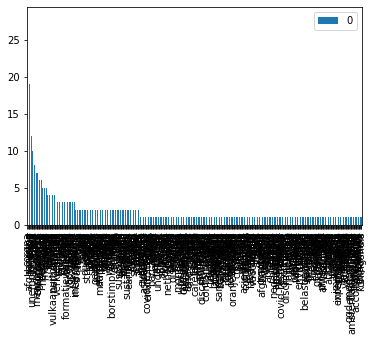

In [88]:
#plot the frequency of words
words.plot.bar()

In [89]:
#export words to see how to recode
words.to_csv('wordfreq.csv', index=False)

In [90]:
issuesIDALL['1_1_freq'] = issuesIDALL['1_1'].str.split().str.len()
issuesIDALL['1_2_freq'] = issuesIDALL['1_2'].str.split().str.len()
issuesIDALL['1_3_freq'] = issuesIDALL['1_3'].str.split().str.len()
issuesIDALL['1_4_freq'] = issuesIDALL['1_8'].str.split().str.len()
issuesIDALL['1_5_freq'] = issuesIDALL['1_9'].str.split().str.len()
issuesIDALL['2_1_freq'] = issuesIDALL['2_1'].str.split().str.len()
issuesIDALL['2_2_freq'] = issuesIDALL['2_2'].str.split().str.len()
issuesIDALL['2_3_freq'] = issuesIDALL['2_3'].str.split().str.len()
issuesIDALL['2_4_freq'] = issuesIDALL['2_8'].str.split().str.len()
issuesIDALL['2_5_freq'] = issuesIDALL['2_9'].str.split().str.len()

In [91]:
issuesIDALL

,LoginID,GA,NOS,FB,Age,Gender,Education,group,1_1,1_2,...,1_1_freq,1_2_freq,1_3_freq,1_4_freq,1_5_freq,2_1_freq,2_2_freq,2_3_freq,2_4_freq,2_5_freq
0,3258,4,4,2,24,1.0,2.0,Google Assistant,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3033,0,0,5,20,1.0,2.0,Facebook,New corona pass rules,Travel to the Netherlands under new COVID rules,...,4.0,8.0,5.0,5.0,7.0,7.0,3.0,5.0,4.0,6.0
2,2032,0,0,2,23,1.0,2.0,Facebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1714,0,4,0,20,1.0,2.0,NOS,The new corona measurements,Tata Steel frabric health issue,...,4.0,5.0,5.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0
4,3106,0,0,2,25,0.0,3.0,Facebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,4677,0,3,2,18,1.0,1.0,NOS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,4773,0,0,2,21,1.0,2.0,Facebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,2651,0,0,2,20,1.0,1.0,Facebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,vale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [92]:
issuesIDALL.to_csv('issuesfreq.csv')

In [93]:
issuesIDALL["1_1"]

0                             NaN
1           New corona pass rules
2                             NaN
3     The new corona measurements
4                             NaN
                 ...             
37                            NaN
38                            NaN
39                            NaN
40                              0
41                              0
Name: 1_1, Length: 192, dtype: object

In [94]:
issuesIDALL.rename(columns={'1_1': 'MIP1','1_2': 'MIP2','1_3': 'MIP3','1_8': 'MIP4','1_9': 'MIP5' }, inplace=True)

In [95]:
issuesIDALL

,LoginID,GA,NOS,FB,Age,Gender,Education,group,MIP1,MIP2,...,1_1_freq,1_2_freq,1_3_freq,1_4_freq,1_5_freq,2_1_freq,2_2_freq,2_3_freq,2_4_freq,2_5_freq
0,3258,4,4,2,24,1.0,2.0,Google Assistant,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3033,0,0,5,20,1.0,2.0,Facebook,New corona pass rules,Travel to the Netherlands under new COVID rules,...,4.0,8.0,5.0,5.0,7.0,7.0,3.0,5.0,4.0,6.0
2,2032,0,0,2,23,1.0,2.0,Facebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1714,0,4,0,20,1.0,2.0,NOS,The new corona measurements,Tata Steel frabric health issue,...,4.0,5.0,5.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0
4,3106,0,0,2,25,0.0,3.0,Facebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,4677,0,3,2,18,1.0,1.0,NOS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,4773,0,0,2,21,1.0,2.0,Facebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,2651,0,0,2,20,1.0,1.0,Facebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,vale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [96]:
#https://stackoverflow.com/questions/58308972/create-a-new-column-with-three-conditions-using-np-where
# COVID = ['corona', 'Corona', 'coronapas', 'COVID', 'CoronaCheck', 'Covid', 'COVID-19', 'vaccination', 'virus', 'covid', 'vaccine', 'CoronaCheck', 'COVID-19']
# housing = ['home', 'housing', 'Housing']
# kabinet =['kabinet', 'klaar', 'formatie', 'Formatie']
# afghanistan = ['Afghanistan']
# conditions = [
#     issuesIDALL['MIP1'].isin(COVID),
#     issuesIDALL['MIP1'].isin(housing),
#     issuesIDALL['MIP1'].isin(kabinet)
# ]

# choices = ['Covid', 'housing', 'kabinet']
# issuesIDALL['MIP1_R'] = np.select(conditions, choices)
# issuesIDALL

In [97]:
issuesIDALL

,LoginID,GA,NOS,FB,Age,Gender,Education,group,MIP1,MIP2,...,1_1_freq,1_2_freq,1_3_freq,1_4_freq,1_5_freq,2_1_freq,2_2_freq,2_3_freq,2_4_freq,2_5_freq
0,3258,4,4,2,24,1.0,2.0,Google Assistant,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3033,0,0,5,20,1.0,2.0,Facebook,New corona pass rules,Travel to the Netherlands under new COVID rules,...,4.0,8.0,5.0,5.0,7.0,7.0,3.0,5.0,4.0,6.0
2,2032,0,0,2,23,1.0,2.0,Facebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1714,0,4,0,20,1.0,2.0,NOS,The new corona measurements,Tata Steel frabric health issue,...,4.0,5.0,5.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0
4,3106,0,0,2,25,0.0,3.0,Facebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,4677,0,3,2,18,1.0,1.0,NOS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,4773,0,0,2,21,1.0,2.0,Facebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,2651,0,0,2,20,1.0,1.0,Facebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,vale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [98]:
issuesIDALL = issuesIDALL[issuesIDALL['group'].notna()]


In [99]:
#manual coding to compare
#proof reliable the automated coding is == to compare
#use markdown to explain all explains and justify/remember steps
#word matching
#Here I try to automate the recoding by adding a topic when one of the strings contain a specific word
# e.g. corona = COVID19, Klimaat = Climate
issuesIDALL['MIP1_R'] = pd.np.where(issuesIDALL.MIP1.str.contains("NAN"), "-",
                               pd.np.where(issuesIDALL.MIP1.str.contains("corona"), "COVID",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Corona"), "COVID",
                               pd.np.where(issuesIDALL.MIP1.str.contains("facemask"), "COVID",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Covid"), "COVID",
                               pd.np.where(issuesIDALL.MIP1.str.contains("rapid tests"), "COVID",
                               pd.np.where(issuesIDALL.MIP1.str.contains("environement"), "Climate",   
                               pd.np.where(issuesIDALL.MIP1.str.contains("Pollution"), "Climate",
                                           pd.np.where(issuesIDALL.MIP1.str.contains("CO2"), "Climate",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Klimaat"), "Climate",
                                           pd.np.where(issuesIDALL.MIP1.str.contains("earthquake"), "Earthquake",
                               pd.np.where(issuesIDALL.MIP1.str.contains("election"), "Elections",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Oranje"), "Sports",
                               pd.np.where(issuesIDALL.MIP1.str.contains("oranje"), "Sports",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Ajax"), "Sports",
                               pd.np.where(issuesIDALL.MIP1.str.contains("crime"), "Crime",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Vacine"), "COVID",  
                               pd.np.where(issuesIDALL.MIP1.str.contains("racism"), "Racism", 
                               pd.np.where(issuesIDALL.MIP1.str.contains("Vaccine"), "COVID",
                               pd.np.where(issuesIDALL.MIP1.str.contains("vaccination"), "COVID",
                               pd.np.where(issuesIDALL.MIP1.str.contains("COVID"), "COVID",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Afghanistan"), "Afghanistan",
                               pd.np.where(issuesIDALL.MIP1.str.contains("refugee"), "Afghanistan",
                               pd.np.where(issuesIDALL.MIP1.str.contains("kabul"), "Afghanistan",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Afghan"), "Afghanistan",
                               pd.np.where(issuesIDALL.MIP1.str.contains("housing"), "Housing",
                               pd.np.where(issuesIDALL.MIP1.str.contains("huizen"), "Housing",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Housing"), "Housing",
                               pd.np.where(issuesIDALL.MIP1.str.contains("formatie"), "Kabinet",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Formatie"), "Kabinet",
                               pd.np.where(issuesIDALL.MIP1.str.contains("NS"), "transport",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Transport"), "transport",
                                           pd.np.where(issuesIDALL.MIP1.str.contains("Parma"), "Volcanic eruption",
                                                       pd.np.where(issuesIDALL.MIP1.str.contains("Vulkaan"), "Volcanic eruption",
                                                                   pd.np.where(issuesIDALL.MIP1.str.contains("volcan"), "Volcanic eruption",
                               pd.np.where(issuesIDALL.MIP1.str.contains("kabinet"), "Kabinet", "Other"))))))))))))))))))))))))))))))))))))
 

<ipython-input-99-65bac6df95c7>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  issuesIDALL['MIP1_R'] = pd.np.where(issuesIDALL.MIP1.str.contains("NAN"), "-",
<ipython-input-99-65bac6df95c7>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(issuesIDALL.MIP1.str.contains("corona"), "COVID",
<ipython-input-99-65bac6df95c7>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(issuesIDALL.MIP1.str.contains("Corona"), "COVID",
<ipython-input-99-65bac6df95c7>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(issuesIDALL.MIP1.str.contains("facemask"), "COVID",
<ipython-input-99-65bac6df95c7>:5: FutureWarning: The

In [100]:
# issuesIDALL.drop(index=issuesIDALL[issuesIDALL['MIP1_R'] == '***'].index, inplace=True)

In [101]:
issuesIDALL['MIP1_R']

0         -
1     COVID
2         -
3     COVID
4         -
      ...  
35        -
36        -
37        -
38        -
39        -
Name: MIP1_R, Length: 190, dtype: object

In [102]:
issuesIDALL['MIP1_R_Number'] = pd.np.where(issuesIDALL.MIP1.str.contains("NAN"), "-",
                               pd.np.where(issuesIDALL.MIP1.str.contains("corona"), "1",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Corona"), "1",
                               pd.np.where(issuesIDALL.MIP1.str.contains("facemask"), "1",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Covid"), "1",
                               pd.np.where(issuesIDALL.MIP1.str.contains("rapid tests"), "1",
                               pd.np.where(issuesIDALL.MIP1.str.contains("environement"), "9",   
                               pd.np.where(issuesIDALL.MIP1.str.contains("Pollution"), "9",
                                           pd.np.where(issuesIDALL.MIP1.str.contains("CO2"), "9",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Klimaat"), "9",
                                           pd.np.where(issuesIDALL.MIP1.str.contains("earthquake"), "8",
                               pd.np.where(issuesIDALL.MIP1.str.contains("election"), "7",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Oranje"), "6",
                               pd.np.where(issuesIDALL.MIP1.str.contains("oranje"), "6",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Ajax"), "6",
                               pd.np.where(issuesIDALL.MIP1.str.contains("crime"), "Crime",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Vacine"), "1",  
                               pd.np.where(issuesIDALL.MIP1.str.contains("racism"), "5", 
                               pd.np.where(issuesIDALL.MIP1.str.contains("Vaccine"), "1",
                               pd.np.where(issuesIDALL.MIP1.str.contains("vaccination"), "1",
                               pd.np.where(issuesIDALL.MIP1.str.contains("COVID"), "1",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Afghanistan"), "2",
                               pd.np.where(issuesIDALL.MIP1.str.contains("refugee"), "2",
                               pd.np.where(issuesIDALL.MIP1.str.contains("kabul"), "2",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Afghan"), "2",
                               pd.np.where(issuesIDALL.MIP1.str.contains("housing"), "3",
                               pd.np.where(issuesIDALL.MIP1.str.contains("huizen"), "3",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Housing"), "3",
                               pd.np.where(issuesIDALL.MIP1.str.contains("formatie"), "4",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Formatie"), "4",
                               pd.np.where(issuesIDALL.MIP1.str.contains("NS"), "10",
                               pd.np.where(issuesIDALL.MIP1.str.contains("Transport"), "10",
                                           pd.np.where(issuesIDALL.MIP1.str.contains("Parma"), "11",
                                                       pd.np.where(issuesIDALL.MIP1.str.contains("Vulkaan"), "11",
                                                                   pd.np.where(issuesIDALL.MIP1.str.contains("volcan"), "11",
                               pd.np.where(issuesIDALL.MIP1.str.contains("kabinet"), "4", "13"))))))))))))))))))))))))))))))))))))
 

<ipython-input-102-a1b0334eed2f>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  issuesIDALL['MIP1_R_Number'] = pd.np.where(issuesIDALL.MIP1.str.contains("NAN"), "-",
<ipython-input-102-a1b0334eed2f>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(issuesIDALL.MIP1.str.contains("corona"), "1",
<ipython-input-102-a1b0334eed2f>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(issuesIDALL.MIP1.str.contains("Corona"), "1",
<ipython-input-102-a1b0334eed2f>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(issuesIDALL.MIP1.str.contains("facemask"), "1",
<ipython-input-102-a1b0334eed2f>:5: FutureWarning: The

In [103]:
issuesIDALL['MIP2_R'] = pd.np.where(issuesIDALL.MIP2.str.contains("NAN"), "-",
                               pd.np.where(issuesIDALL.MIP2.str.contains("corona"), "COVID",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Corona"), "COVID",
                               pd.np.where(issuesIDALL.MIP2.str.contains("facemask"), "COVID",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Covid"), "COVID",
                               pd.np.where(issuesIDALL.MIP2.str.contains("rapid tests"), "Rapid tests",
                               pd.np.where(issuesIDALL.MIP2.str.contains("environement"), "Climate",   
                               pd.np.where(issuesIDALL.MIP2.str.contains("Pollution"), "Climate",
                                           pd.np.where(issuesIDALL.MIP2.str.contains("CO2"), "Climate",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Klimaat"), "Climate",
                                           pd.np.where(issuesIDALL.MIP2.str.contains("earthquake"), "Earthquake",
                               pd.np.where(issuesIDALL.MIP2.str.contains("election"), "Elections",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Oranje"), "Sports",
                               pd.np.where(issuesIDALL.MIP2.str.contains("oranje"), "Sports",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Ajax"), "Sports",
                               pd.np.where(issuesIDALL.MIP2.str.contains("crime"), "Crime",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Vacine"), "COVID",  
                               pd.np.where(issuesIDALL.MIP2.str.contains("Racism"), "Racism", 
                               pd.np.where(issuesIDALL.MIP2.str.contains("Vaccine"), "COVID",
                               pd.np.where(issuesIDALL.MIP2.str.contains("vaccination"), "COVID",
                               pd.np.where(issuesIDALL.MIP2.str.contains("COVID"), "COVID",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Afghanistan"), "Afghanistan",
                               pd.np.where(issuesIDALL.MIP2.str.contains("refugee"), "Afghanistan",
                               pd.np.where(issuesIDALL.MIP2.str.contains("kabul"), "Afghanistan",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Afghan"), "Afghanistan",
                               pd.np.where(issuesIDALL.MIP2.str.contains("housing"), "Housing",
                               pd.np.where(issuesIDALL.MIP2.str.contains("huizen"), "Housing",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Housing"), "Housing",
                               pd.np.where(issuesIDALL.MIP2.str.contains("formatie"), "Kabinet",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Formatie"), "Kabinet",
                               pd.np.where(issuesIDALL.MIP2.str.contains("NS"), "transport",
                               pd.np.where(issuesIDALL.MIP2.str.contains("Transport"), "transport",
                                           pd.np.where(issuesIDALL.MIP2.str.contains("Parma"), "Volcanic eruption",
                                                       pd.np.where(issuesIDALL.MIP2.str.contains("Vulkaan"), "Volcanic eruption",
                                                                   pd.np.where(issuesIDALL.MIP2.str.contains("volcan"), "Volcanic eruption",
                               pd.np.where(issuesIDALL.MIP2.str.contains("kabinet"), "Kabinet", "Other"))))))))))))))))))))))))))))))))))))
 

<ipython-input-103-875e58dfb2eb>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  issuesIDALL['MIP2_R'] = pd.np.where(issuesIDALL.MIP2.str.contains("NAN"), "-",
<ipython-input-103-875e58dfb2eb>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(issuesIDALL.MIP2.str.contains("corona"), "COVID",
<ipython-input-103-875e58dfb2eb>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(issuesIDALL.MIP2.str.contains("Corona"), "COVID",
<ipython-input-103-875e58dfb2eb>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(issuesIDALL.MIP2.str.contains("facemask"), "COVID",
<ipython-input-103-875e58dfb2eb>:5: FutureWarning

In [104]:
issuesIDALL['MIP3_R'] = pd.np.where(issuesIDALL.MIP3.str.contains("NAN"), "-",
                               pd.np.where(issuesIDALL.MIP3.str.contains("corona"), "COVID",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Corona"), "COVID",
                               pd.np.where(issuesIDALL.MIP3.str.contains("facemask"), "COVID",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Covid"), "COVID",
                               pd.np.where(issuesIDALL.MIP3.str.contains("rapid tests"), "Rapid tests",
                               pd.np.where(issuesIDALL.MIP3.str.contains("environement"), "Climate",   
                               pd.np.where(issuesIDALL.MIP3.str.contains("Pollution"), "Climate",
                               pd.np.where(issuesIDALL.MIP3.str.contains("CO2"), "Climate",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Klimaat"), "Climate",
                               pd.np.where(issuesIDALL.MIP3.str.contains("earthquake"), "Earthquake",
                               pd.np.where(issuesIDALL.MIP3.str.contains("election"), "Elections",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Oranje"), "Sports",
                               pd.np.where(issuesIDALL.MIP3.str.contains("oranje"), "Sports",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Ajax"), "Sports",
                               pd.np.where(issuesIDALL.MIP3.str.contains("crime"), "Crime",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Vacine"), "COVID",  
                               pd.np.where(issuesIDALL.MIP3.str.contains("Racism"), "Racism", 
                               pd.np.where(issuesIDALL.MIP3.str.contains("Vaccine"), "COVID",
                               pd.np.where(issuesIDALL.MIP3.str.contains("vaccination"), "COVID",
                               pd.np.where(issuesIDALL.MIP3.str.contains("COVID"), "COVID",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Afghanistan"), "Afghanistan",
                               pd.np.where(issuesIDALL.MIP3.str.contains("refugee"), "Afghanistan",
                               pd.np.where(issuesIDALL.MIP3.str.contains("kabul"), "Afghanistan",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Afghan"), "Afghanistan",
                               pd.np.where(issuesIDALL.MIP3.str.contains("housing"), "Housing",
                               pd.np.where(issuesIDALL.MIP3.str.contains("huizen"), "Housing",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Housing"), "Housing",
                               pd.np.where(issuesIDALL.MIP3.str.contains("formatie"), "Kabinet",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Formatie"), "Kabinet",
                               pd.np.where(issuesIDALL.MIP3.str.contains("NS"), "transport",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Transport"), "transport",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Parma"), "Volcanic eruption",
                               pd.np.where(issuesIDALL.MIP3.str.contains("Vulkaan"), "Volcanic eruption",
                               pd.np.where(issuesIDALL.MIP2.str.contains("volcan"), "Volcanic eruption",
                               pd.np.where(issuesIDALL.MIP3.str.contains("kabinet"), "Kabinet", "Other"))))))))))))))))))))))))))))))))))))
 

<ipython-input-104-c43d3b65f34c>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  issuesIDALL['MIP3_R'] = pd.np.where(issuesIDALL.MIP3.str.contains("NAN"), "-",
<ipython-input-104-c43d3b65f34c>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(issuesIDALL.MIP3.str.contains("corona"), "COVID",
<ipython-input-104-c43d3b65f34c>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(issuesIDALL.MIP3.str.contains("Corona"), "COVID",
<ipython-input-104-c43d3b65f34c>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(issuesIDALL.MIP3.str.contains("facemask"), "COVID",
<ipython-input-104-c43d3b65f34c>:5: FutureWarning

In [105]:
issuesIDALL
#manual coding-categories, set codebook documented. what is an issue. identify issue. rapid test, vaccine and covid. detail or general level. issue by issue -> guideline
#how to treat different issues. coding
#what do we mean by issue. == issue sets. (strategy and example issues. categorizing. typical examples)

,LoginID,GA,NOS,FB,Age,Gender,Education,group,MIP1,MIP2,...,1_5_freq,2_1_freq,2_2_freq,2_3_freq,2_4_freq,2_5_freq,MIP1_R,MIP1_R_Number,MIP2_R,MIP3_R
0,3258,4,4,2,24,1.0,2.0,Google Assistant,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-,-,-,-
1,3033,0,0,5,20,1.0,2.0,Facebook,New corona pass rules,Travel to the Netherlands under new COVID rules,...,7.0,7.0,3.0,5.0,4.0,6.0,COVID,1,COVID,Other
2,2032,0,0,2,23,1.0,2.0,Facebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-,-,-,-
3,1714,0,4,0,20,1.0,2.0,NOS,The new corona measurements,Tata Steel frabric health issue,...,4.0,3.0,2.0,2.0,4.0,2.0,COVID,1,Other,Other
4,3106,0,0,2,25,0.0,3.0,Facebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,3084,0,0,5,18,1.0,2.0,Facebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-,-,-,-
36,1017,0,5,4,19,1.0,2.0,NOS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-,-,-,-
37,4677,0,3,2,18,1.0,1.0,NOS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-,-,-,-
38,4773,0,0,2,21,1.0,2.0,Facebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-,-,-,-


In [106]:
issuesIDALL.to_csv("issuesRecode.csv")

In [107]:
MIPFREQ1 = issuesIDALL.MIP1_R.str.split(expand=True).stack().value_counts()
MIPFREQ1

-              145
COVID           22
Kabinet         10
Housing          5
Other            4
transport        2
Afghanistan      1
Racism           1
dtype: int64

In [108]:
MIPFREQ1.iloc[:,0].value_counts(normalize = True)

IndexingError: Too many indexers

In [ ]:
MIPFREQ1 = pd.DataFrame(MIPFREQ1)

In [ ]:
MIPFREQ1['issues'] = MIPFREQ1.index

In [ ]:
MIPFREQ1

In [ ]:
MIPFREQ1.reset_index(inplace=True)
MIPFREQ1.set_index('issues', inplace=True)

In [ ]:
issues = {}
for i in issuesIDALL["MIP1"]:
    for j in i:
        if j not in issues:
            issues[j] = 1
        else:
            issues[j] += 1

In [ ]:
MIPFREQ1

In [ ]:
MIPFREQ1.plot.bar()

In [ ]:
MIPFREQ1.plot.bar()

In [ ]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
to_1D(MIPFREQ1["issues"]).value_counts()

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(MIPFREQ1["issues"]).value_counts().index,
        to_1D(MIPFREQ1["issues"]).value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Most important issues", size = 14)

In [ ]:
MIPFREQ1.to_csv("MIPFREQ1.csv")

In [ ]:
MIPFREQ2 = issuesIDALL.MIP2.str.split(expand=True).stack().value_counts()
MIPFREQ2['issues'] = MIPFREQ2.index
MIPFREQ2

In [ ]:
MIPFREQ1.to_csv('MIPFREQ1.csv')

In [ ]:
issuesIDALL

In [180]:
from stemming.porter2 import stem
listtext_stem = [[stem(word) for word in sentence.split(" ")] for sentence in listtext]

In [182]:
listtext_stem

[['age',
  'population,lack',
  'polit',
  'stabil',
  ',pollution,undesir',
  'hous',
  'market,lif',
  'costs,covid,racism,politics,crim',
  'rate,tax'],
 ['The',
  'new',
  'corona',
  'measurements,Tata',
  'Steel',
  'frabric',
  'health',
  'issue,Minsit',
  'foreign',
  'affair',
  'resigns,Drug',
  'traffic,disrupt',
  'train',
  'traffic,New',
  'corona',
  'measurements,Clim',
  'chang',
  ',Afghanistan',
  'crisis,Abus',
  'US',
  'gymnasit',
  'team,MET',
  'gala'],
 ['Hous',
  'crisis,Covid',
  'measures,Vaccin',
  'passport,Afghanistan',
  'conflict,Clim',
  'change,Covid,Afghanistan,Clim',
  'change,Ha',
  'earthquak',
  'refugees,Conflict',
  'south',
  'china',
  'sea'],
 ['Hous',
  'market,Healthcar',
  'system,Unemploy',
  'internationals,Sexu',
  'assault,Environment,Corona',
  'measures,Intern',
  'student',
  'struggl',
  'find',
  'housing,Healthcar',
  'sector',
  'carelessness,Drug',
  'traffick',
  'teach',
  'children,Nazi',
  'stunt',
  'Urk'],
 ['New',
  'c

In [184]:
listtext_stem = pd.DataFrame(listtext_stem)

In [187]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

corpus = listtext
df = pd.DataFrame(data=corpus)

vectorizer = CountVectorizer(min_df=5, stop_words='english')
X = vectorizer.fit_transform(df.values.ravel())
result = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names())
print(result)


    afghanistan  corona  coronacheck  covid  crime  crisis  drug  formatie  \
0             0       0            0      1      1       0     0         0   
1             1       2            0      0      0       1     1         0   
2             2       0            0      2      0       1     0         0   
3             0       1            0      0      0       0     1         0   
4             1       3            0      1      0       0     0         0   
5             1       0            0      0      0       0     0         1   
6             1       0            0      2      1       1     0         0   
7             0       1            0      0      0       1     1         0   
8             1       2            0      0      0       1     1         0   
9             0       0            0      0      1       0     0         0   
10            0       0            1      2      0       0     0         0   
11            0       3            0      0      0       0     0

<AxesSubplot:>

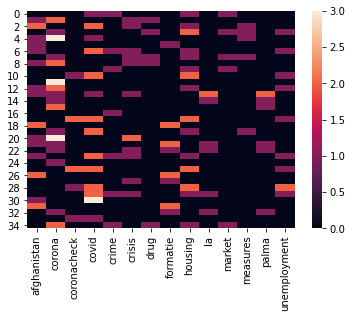

In [188]:
#plot matrix
from io import StringIO # string to data frame
import seaborn as sns # plotting
sns.heatmap(result)


In [194]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

corpus = issuesIDALL["MIP1_R"]
df = pd.DataFrame(data=corpus)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.values.ravel())
col = vectorizer.get_feature_names()
result_MIP1_R = pd.DataFrame(data=X.toarray(), columns = col)
print(result_MIP1_R)



     afghanistan  covid  housing  kabinet  other  racism  transport
0              0      0        0        0      0       0          0
1              0      1        0        0      0       0          0
2              0      0        0        0      0       0          0
3              0      1        0        0      0       0          0
4              0      0        0        0      0       0          0
..           ...    ...      ...      ...    ...     ...        ...
185            0      0        0        0      0       0          0
186            0      0        0        0      0       0          0
187            0      0        0        0      0       0          0
188            0      0        0        0      0       0          0
189            0      0        0        0      0       0          0

[190 rows x 7 columns]


<AxesSubplot:>

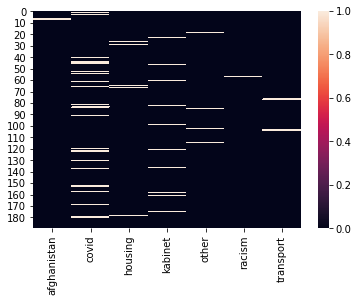

In [198]:
#plot matrix
from io import StringIO # string to data frame
import seaborn as sns # plotting
sns.heatmap(result_MIP1_R)x

In [ ]:
COVID = ['corona', 'Corona', 'coronapas', 'COVID', 'CoronaCheck', 'Covid', 'COVID-19', 'vaccination', 'virus', 'covid', 'vaccine', 'CoronaCheck', 'COVID-19']

issuesIDALL["MIP1_R"] = issuesIDALL['MIP1'].apply(lambda x: "COVID" if any(i in str(x) for i in COVID) else "Other")

In [ ]:
#https://stackoverflow.com/questions/58308972/create-a-new-column-with-three-conditions-using-np-where
covid = ['corona', 'Corona', 'coronapas', 'COVID', 'CoronaCheck', 'Covid', 'COVID-19', 'vaccination', 'virus', 'covid', 'vaccine', 'CoronaCheck', 'COVID-19']

politics = ['tunnel', 'housing', 'kabinet', 'political', 'incident', 'transport', 'accommodation']
international = ['elections', 'Afghanistan', 'foreign', 'nazi', 'china', 'Europa', 'eu', 'haiti', 'Canary', 'Brexit']
economy = ['taxes', 'income', 'unemployment']
immigration = ['immigration', 'internationals', 'salaries', 'Klimaat']
climate = ['pollution', 'climate', 'environment', 'sustainability', 'global warming']
sports = ['Millieu', 'F1', 'Ajax']
celebrities = ['MET gala']
issuesIDALL['MIP1_R'] = issuesIDALL['MIP1'].apply(lambda x: 'COVID' if any(i in str(x) for i in covid) else x)


In [ ]:
issuesIDALL['MIP1_R'] = issuesIDALL['MIP1'].apply(lambda x: 'COVID' if any(i in str(x) for i in housing) else x)

In [ ]:
afghanistan = ['Afghanistan']
issuesIDALL['MIP1_R'] = issuesIDALL['MIP1'].apply(lambda x: 'Afghanistan' if any(i in str(x) for i in afghanistan) else x)

In [ ]:
issuesIDALL['MIP1'].fillna("-")

In [ ]:
covid = ['corona', 'Corona', 'coronapas', 'COVID', 'CoronaCheck', 'Covid', 'COVID-19', 'vaccination', 'virus', 'covid', 'vaccine', 'CoronaCheck', 'COVID-19']
housing = ['home', 'housing', 'Housing']
def get_failure_type(topic):
        if topic == covid:
           return 'COVID'
        elif topic == 'home' or topic == 'housing' or topic == 'Housing':
            return 'Housing'
        return topic

issuesIDALL['MIP1_R'] = issuesIDALL['MIP1'].apply(lambda x: get_failure_type(x))

In [ ]:
issuesIDALL['MIP1_R']

In [ ]:
issuesIDALL.fillna(0)

In [ ]:
issuesIDALL['MIP1']

In [ ]:
issuesIDALL['MIP1_R']

In [ ]:
kabinet =['kabinet', 'klaar', 'formatie', 'Formatie']
issuesIDALL['MIP1_R'] = issuesIDALL['MIP1'].apply(lambda x: 'COVID' if any(i in str(x) for i in kabinet) else x)

In [ ]:
COVID = ['corona', 'Corona', 'coronapas', 'COVID', 'CoronaCheck', 'Covid', 'COVID-19', 'vaccination', 'virus', 'covid', 'vaccine', 'CoronaCheck', 'COVID-19']
housing = ['home', 'housing', 'Housing']
kabinet =['kabinet', 'klaar', 'formatie', 'Formatie']
afghanistan = ['Afghanistan']
politics = ['tunnel', 'housing', 'kabinet', 'political', 'incident', 'transport', 'accommodation']
international = ['elections', 'Afghanistan', 'foreign', 'nazi', 'china', 'Europa', 'eu', 'haiti', 'Canary', 'Brexit']
economy = ['taxes', 'income', 'unemployment']
immigration = ['immigration', 'internationals', 'salaries', 'Klimaat']
climate = ['pollution', 'climate', 'environment', 'sustainability', 'global warming']
sports = ['Millieu', 'F1', 'Ajax']
celebrities = ['MET gala']
def recodeissues(issues):
    if any(word in COVID for word in issues1.lower().split()):
        return 'COVID-19'
    elif any(word in housing for word in issues1.lower().split()):
        return 'Housing'
    elif any(word in kabinet for word in issues1.lower().split()):
        return 'Kabinet'
    elif any(word in afghanistan for word in issues1.lower().split()):
        return 'Afghanistan'
#     elif any(word in economy for word in issues1.lower().split()):
#         return 'Economy'
#     elif any(word in immigration for word in issues1.lower().split()):
#         return 'Immigration'
#     elif any(word in climate for word in issues1.lower().split()):
#         return 'Climate Change'
#     elif any(word in sports for word in issues1.lower().split()):
#         return 'Sports'
#     elif any(word in celebrities for word in issues1.lower().split()):
#         return 'Enterteinment and Celebrities'
    else:
        return word
 
MIP1 = issues.apply(recodeissues) 


In [ ]:
MIP1_expanded = issues["1_1"].apply(pd.Series)

In [ ]:
MIP1_expanded

In [ ]:
MIP1_D1_freq = MIP1_D1.str.split(expand=True).stack().value_counts()
MIP1_D1_freq = pd.DataFrame(MIP1_D1_freq)
MIP1_D1_freq['issues'] = MIP1_D1_freq.index
MIP1_D1_freq.to_csv('MIP1_D1_freq.csv', index=False)

In [ ]:
MIP2_D1 = issues['1_2'].apply(recodeissues) 
MIP2_D1

In [ ]:
#get frequencies of all words
# wordcount1 = listtext.str.split(',',expand=True).stack().value_counts()
MIP2_D1_freq = MIP2_D1.str.split(expand=True).stack().value_counts()
MIP2_D1_freq = pd.DataFrame(MIP2_D1_freq)
MIP2_D1_freq = MIP2_D1_freq.rename(columns={"0": "frequency"})
MIP2_D1_freq['words'] = MIP2_D1_freq.index
MIP2_D1_freq
MIP2_D1_freq.to_csv('MIP2_D1_freq.csv', index=False)

In [ ]:
MIP3_D1 = issues['1_3'].apply(recodeissues) 
MIP3_D1

In [ ]:
MIP3_D1_freq = MIP3_D1.str.split(expand=True).stack().value_counts()
MIP3_D1_freq = pd.DataFrame(MIP3_D1_freq)
MIP3_D1_freq = MIP3_D1_freq.rename(columns={"0": "frequency"})
MIP3_D1_freq['words'] = MIP3_D1_freq.index
MIP3_D1_freq
MIP3_D1_freq.to_csv('MIP3_D1_freq.csv', index=False)

In [ ]:
MIP3_D1['Freq'] = MIP3_D1.str.split().str.len()
MIP3_D1['Freq'].sort_values(ascending=False)
print(MIP3_D1)

In [ ]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
listtext = listtext.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(listtext)

In [ ]:
def buildGroup(initial):
    for x in initial: 
    if initial["GA"] < 1:
        return df_new["Group"] = "Google" & df[]
    elif initial["NOS"] <= 3:
        return df_new["Group"] = "NOS"
    elif initial["FB"] < 3:
        return df_new["Group"] = "Facebook"
buildGroup(initial)

In [ ]:
#concat dataframes

In [ ]:
def iteratecol(df_merged):
    for index in range(df_merged.shape[1]):
        columnSeriesObj = df_merged.iloc[:, index]
        print (columnSeriesObj.values)
iteratecol(df_merged)


In [ ]:
df_merged['alltext']

In [ ]:
def splitStr(string, sep="\s+"):
    # warning: does not yet work if sep is a lookahead like `(?=b)`
    if sep=='':
        return (c for c in string)
    else:
        return (_.group(1) for _ in re.finditer(f'(?:^|{sep})((?:(?!{sep}).)*)', string))


In [ ]:
def iteratecolspecific(df_merged):
    for word in iteratecol(df_merged):
        for word in column:
            if word in newCol:
                newCol.index(word)[1] +=1
            else:
                newCol.append([word,0])
iteratecolspecific(df_merged)

In [ ]:
for word in list1:
    try:
        list2.index(word)[1] += 1
    except:
        list2.append([word,0])

In [ ]:
        print(df_merged[column].str.lower().str.replace('[^\w\s]',''))
        new_df = df_merged.col_val.str.split(expand=True).stack().value_counts().reset_index()
        new_df.columns = ['Word', 'Frequency']
    return new_df
iteratecolspecific(df_merged)

In [ ]:
q2 = [x for x in df_merged.columns[df_merged.columns.str.contains('1'or'2')]]
print(q2)

In [ ]:
covid = ['covid', 'corona','COVID','CoronaCheck']
def health(covid, df_merged):
    for column in df_merged.columns[1:]:
        if column.contains(covid):
            return 'Health'

print(health(covid,df_merged))

In [ ]:
def column_check(list1,list2):
    for word in list2:
        if word in list1:
            return 1
    return 0

print(column_check(list1, list2)

In [ ]:
import nltk
word_dist = nltk.FreqDist(df_merged['3_1_1'])
word_dist

In [ ]:
#word frequency
import nltk
word_dist = nltk.FreqDist(data[df_merged])
print('All frequencies')
print('='*60)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])

print(rslt)
print ('='*60)

In [ ]:
if df_merged['GA'] < 0:
    

In [ ]:
#after cleaning and merging the data
#install scikit-learn for tf-idf

In [111]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import numpy as np
from scipy.sparse.csr import csr_matrix

In [112]:
doc1 = issues['1_1'].astype(str)

In [113]:
doc1.head()

5                aging population
7     The new corona measurements
9                  Housing crisis
10                 Housing market
13          New corona pass rules
Name: 1_1, dtype: object

In [114]:
issues

,LoginID,1_1,1_2,1_3,1_8,1_9,2_1,2_2,2_3,2_8,...,totalwords_1,totalwords_2,totalwords_3,totalwords_4,totalwords_5,totalwords_6,totalwords_7,totalwords_8,totalwords_9,totalwords_10
5,4293,aging population,lack of political stability,pollution,undesirable housing market,life costs,covid,racism,politics,crime rate,...,2,5,1,3,2,1,1,1,2,1
7,1714,The new corona measurements,Tata Steel frabric health issue,Minsiter of foreign affairs resigns,Drug traffic,disruption of train traffic,New corona measurements,Climate change,Afghanistan crisis,Abuse US gymnasitic team,...,4,5,5,2,4,3,3,2,4,2
9,2362,Housing crisis,Covid measures,Vaccine passport,Afghanistan conflict,Climate change,Covid,Afghanistan,Climate change,Haiti earthquake refugees,...,2,2,2,2,2,1,1,2,3,5
10,1792,Housing market,Healthcare system,Unemployment for internationals,Sexual assault,Environment,Corona measures,International students struggling to find housing,Healthcare sector carelessness,Drug traffickers teaching children,...,2,2,3,2,1,2,6,3,4,4
13,3033,New corona pass rules,Travel to the Netherlands under new COVID rules,Amsterdam bridge and tunnel plan,Rutte visit to the UK,Assessment of work-life balance in the Netherl...,Corona virus new measures around the world,Corona virus vaccine,After Taliban took over Afghanistan,US Australia new deal,...,4,8,5,5,7,8,3,5,4,6
3,1902,Formatie,Afghanistan,Opstappen Kaag & Bijleveld,Max Verstappen F1,Belastingaffaire,Ajax 9-0,Formatieweekend,Opstappen Sigrid Kaag,Opstappen Ank Bijleveld,...,1,1,4,3,1,2,1,3,3,3
5,2370,Covid 19,housing,environment,crime,unemployment,Afghanistan refugee crisis,COVID-19,environment,income inequality,...,2,1,1,1,1,3,1,1,2,1
6,1792,Housing market crisis,Foreigners cannot find a job,Poor healthcare system,Sexual assault,Corona measures,Nazi stunt in Urk,Non-EU visitors needing daily tests,Foreign students can't find a place to live,Drug traffickers training children to work,...,3,5,3,2,2,4,5,8,6,5
8,1714,Corona measurements,Tata steel fabric health issues,Minister of foreins affairs resigns,Train trafic disruptions,Drug traffic,Corona measurements,Climate change,Afghanistan crisis,US gymnastic team abuse,...,2,5,5,3,2,2,2,2,4,2
11,4293,racism,weed,unstable political system,poor housing market,high life cost,high taxes,life quality,politics,environmental issues,...,1,1,3,3,3,2,2,1,2,3


In [117]:
#TF IDF Question 1 Day 1
vectorizer = TfidfVectorizer()
doc1  = issues['1_1'].values.astype('U')
X = vectorizer.fit_transform(doc1)
print(vectorizer.get_feature_names())
print(X)
for i, feature in enumerate(vectorizer.get_feature_names()):
    print(i, feature)
#this word == tf-idf above certain threshold

['19', 'aging', 'app', 'cases', 'conductors', 'corona', 'coronacheck', 'coronapas', 'covid', 'crisis', 'de', 'for', 'formatie', 'fraude', 'healthcare', 'higher', 'housing', 'international', 'kabinet', 'klaar', 'market', 'measurements', 'new', 'ns', 'on', 'pas', 'pass', 'population', 'prices', 'racism', 'regulation', 'restriction', 'rules', 'russischr', 'strike', 'system', 'the', 'update', 'verkiezingen', 'wages', 'wanneer']
  (0, 27)	0.7071067811865476
  (0, 1)	0.7071067811865476
  (1, 21)	0.47378011569546746
  (1, 5)	0.36335967034568845
  (1, 22)	0.509327559303536
  (1, 36)	0.6197480046533149
  (2, 9)	0.7606549559863789
  (2, 16)	0.6491564048311932
  (3, 20)	0.7321960312204355
  (3, 16)	0.6810939523039701
  (4, 32)	0.5755158519646076
  (4, 26)	0.5755158519646076
  (4, 5)	0.3374262582185456
  (4, 22)	0.47297624521696124
  (5, 12)	1.0
  (6, 0)	0.7481606632831929
  (6, 8)	0.6635176123628166
  (7, 20)	0.5722851827072715
  (7, 9)	0.6237786525628801
  (7, 16)	0.5323437444551617
  (8, 21)	0.

In [ ]:
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorize the text
tfidf  = TfidfVectorizer()
tuple_vectors = tfidf.fit_transform(doc1)

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(tuple_vectors)
tsne.poof()

In [ ]:
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
  print w, s

In [ ]:
vectorizer = TfidfVectorizer()
doc1  = df_merged['1_1_1'].values.astype('U')
X = vectorizer.fit_transform(doc1)
matrix = document_matrix(X, vectorizer)
matrix

In [ ]:
vectorizer = TfidfVectorizer()
doc2  = df_merged['2_1_1'].values.astype('U')
X = vectorizer.fit_transform(doc2)
print(vectorizer.get_feature_names())

In [ ]:
vectorizer = TfidfVectorizer()
doc3  = df_merged['3_1_1'].values.astype('U')
X = vectorizer.fit_transform(doc3)
print(vectorizer.get_feature_names())

In [ ]:
def ChunkIterator(filename):
    for chunk in (df_merged, chunksize=1):
        for document in chunk['1_1_1'].values:
            yield document

In [ ]:
np.char.lower(data)